In [172]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [173]:
with open(f'dataframes/{29}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.759260e+09,1.759260e+09,"[464.68, 380.75, 382.51, 382.05, 382.12, 381.9...",775,1,5
1,Tag2,Tag1,1.759260e+09,1.759261e+09,"[409.36, 76.1, 76.26, 75.95, 76.41, 76.26, 76....",775,1,5
2,Tag1,Tag2,1.759261e+09,1.759261e+09,"[379.99, 316.13, 316.66, 316.66, 316.43, 316.6...",785,1,5
3,Tag2,Tag1,1.759261e+09,1.759261e+09,"[72.29, 105.86, 105.02, 105.33, 105.33, 105.25...",785,1,5
4,Tag1,Tag2,1.759261e+09,1.759261e+09,"[315.98, 147.59, 147.9, 147.67, 148.13, 148.51...",795,1,5


In [174]:
len(list(range(775,1000,10)))

23

Bad data found at 41 df_idx (freq=975) at phase 1.
5 36.17100000000001 1.1154927162469497


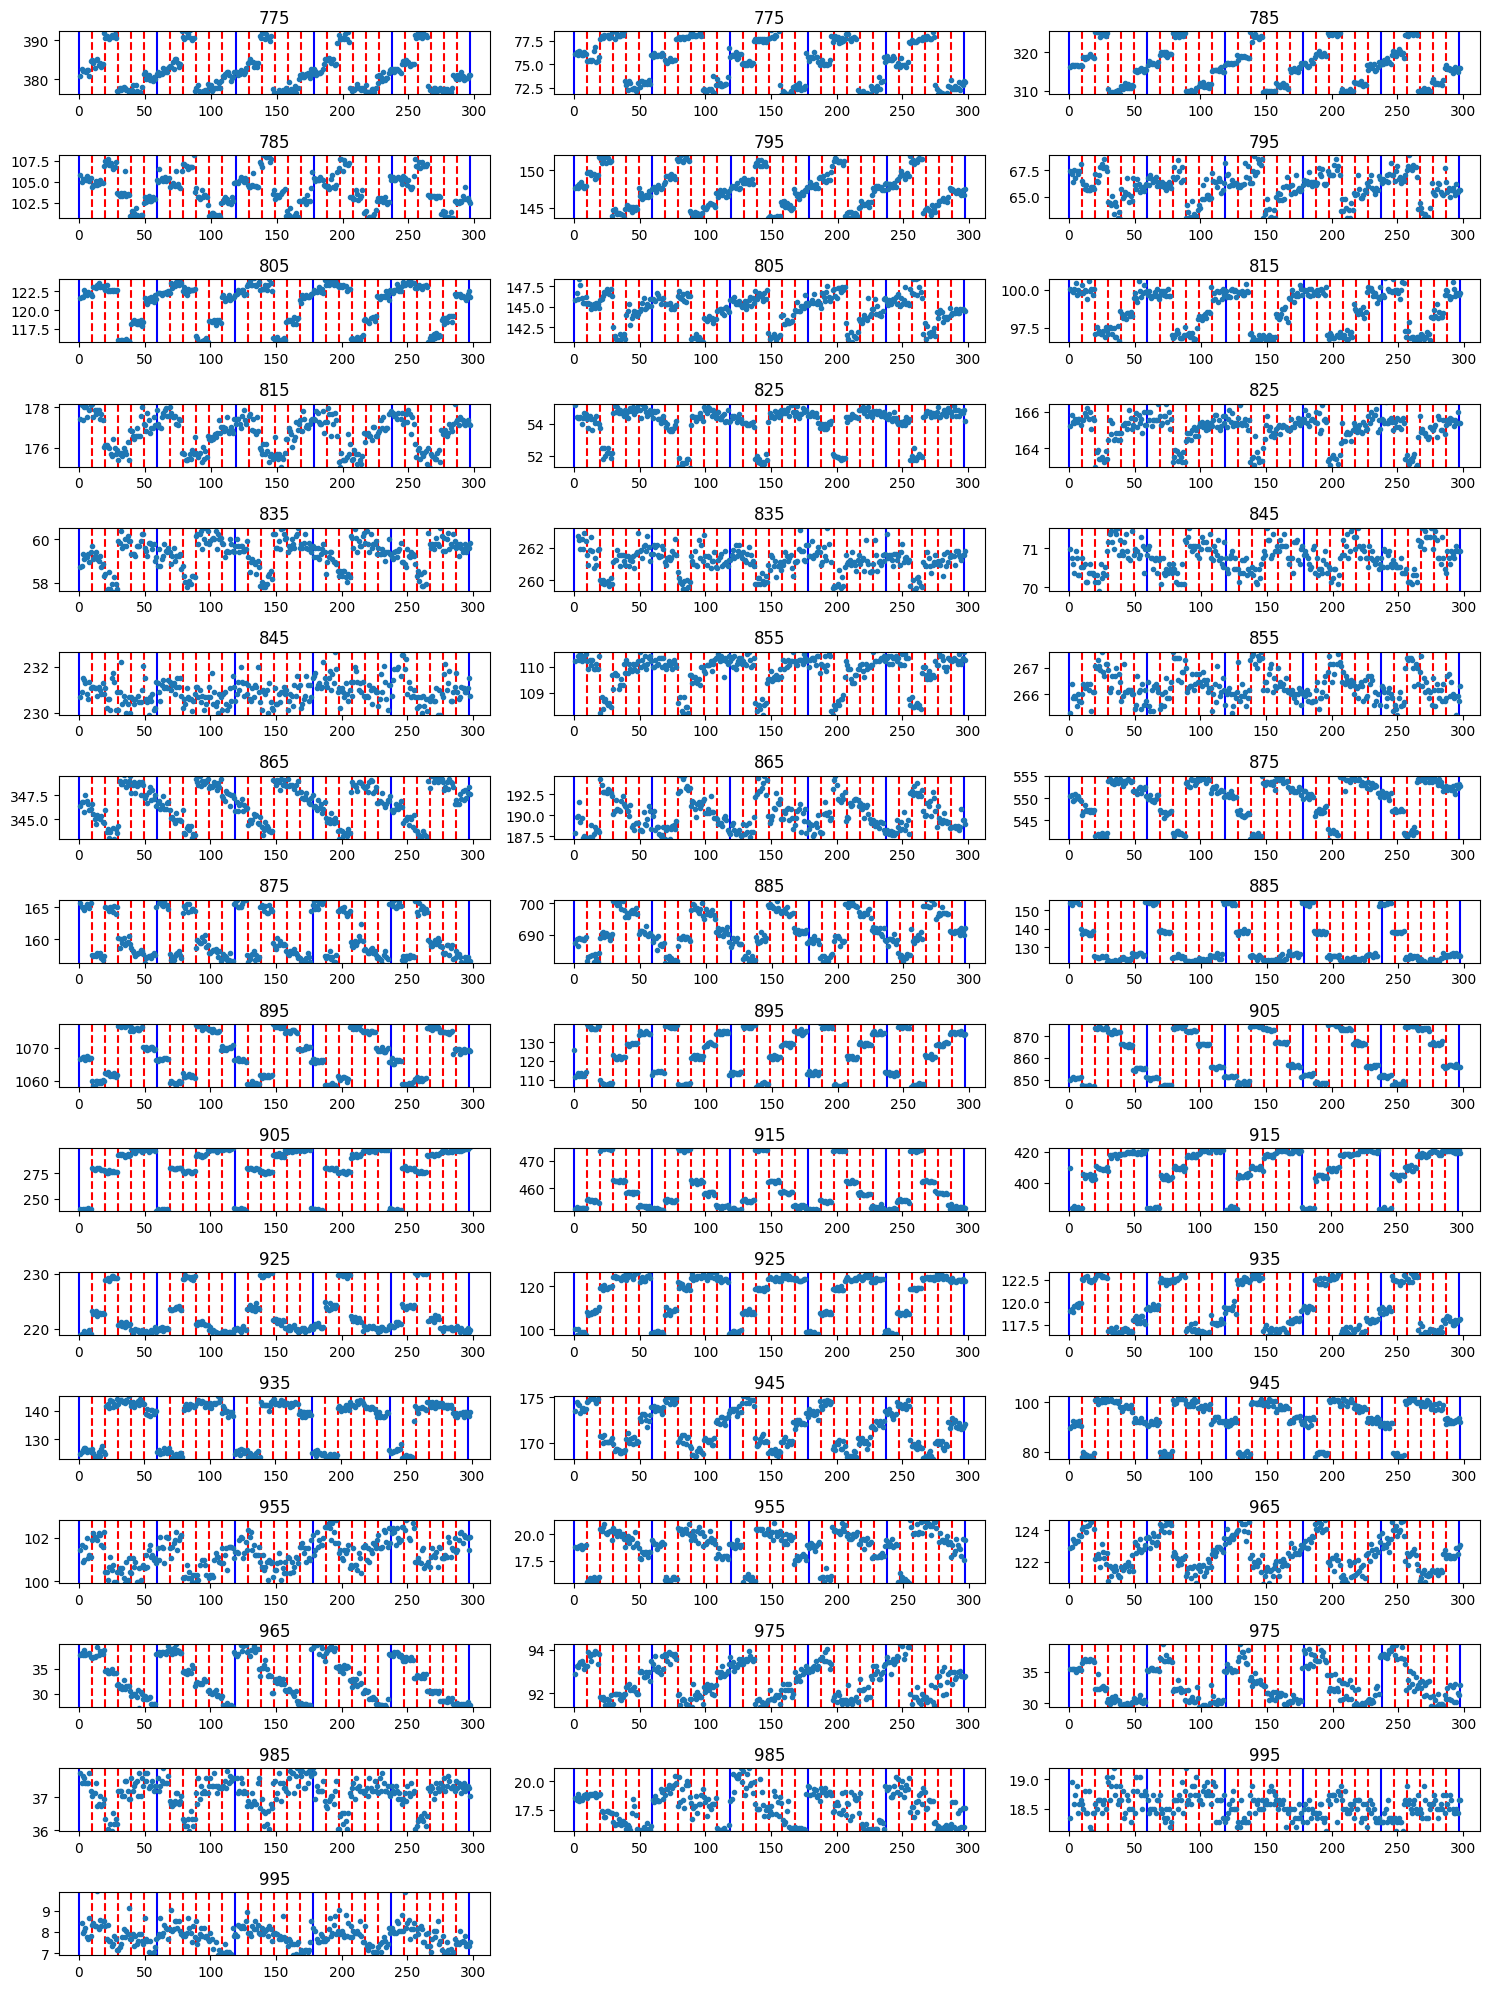

In [175]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
freqs=list(range(775,1005,10))
freqs+=freqs
freqs=sorted(freqs)
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(15,20))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx (freq={freqs[df_idx]}) at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.ylim([np.percentile(voltages,1), np.percentile(voltages,99)])
        plt.title(freqs[df_idx])
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [176]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[464.68, 380.75, 382.51, 382.05, 382.12, 381.9...","[382.12, 381.86, 381.82, 381.93, 382.544999999...","[384.22, 383.995, 384.26, 384.985, 384.145]","[390.86, 390.825, 390.705, 390.36, 390.975]","[377.20000000000005, 377.04999999999995, 376.8...","[376.86, 377.78, 377.28, 377.2, 377.51]","[380.37, 380.71000000000004, 381.17, 380.44500...",775,1,5
1,Tag2,Tag1,"[409.36, 76.1, 76.26, 75.95, 76.41, 76.26, 76....","[76.26, 75.95, 76.03, 75.72, 75.455]","[75.41499999999999, 75.455, 75.11, 75.04, 75.035]","[77.9, 77.86, 77.63, 77.63, 77.55]","[78.16499999999999, 78.05000000000001, 77.935,...","[72.47999999999999, 72.29, 71.91, 71.91, 71.98]","[72.98, 72.86, 72.63, 72.63499999999999, 72.595]",775,1,5
2,Tag1,Tag2,"[379.99, 316.13, 316.66, 316.66, 316.43, 316.6...","[316.59, 316.93, 317.08000000000004, 317.31, 3...","[318.76, 319.6, 318.8, 319.40999999999997, 320...","[324.94, 324.94, 324.1, 324.98, 324.865]","[309.605, 309.83500000000004, 309.87, 309.87, ...","[310.94, 311.17, 311.245, 311.935, 312.01]","[315.25, 315.33000000000004, 315.56, 316.28, 3...",785,1,5
3,Tag2,Tag1,"[72.29, 105.86, 105.02, 105.33, 105.33, 105.25...","[105.25, 105.21000000000001, 105.095, 105.25, ...","[104.795, 104.565, 104.49, 104.565, 105.17]","[107.11500000000001, 106.815, 107.884999999999...","[103.57, 103.11, 103.495, 103.075, 103.2299999...","[101.05, 100.98, 100.98, 101.015, 100.9]","[102.845, 102.655, 102.695, 102.77, 102.845]",785,1,5
4,Tag1,Tag2,"[315.98, 147.59, 147.9, 147.67, 148.13, 148.51...","[147.9, 147.67, 147.745, 148.01, 148.165]","[149.45999999999998, 149.235, 148.395, 149.155...","[151.595, 151.405, 150.91, 151.18, 151.3349999...","[144.16, 144.2, 143.74, 144.16000000000003, 14...","[144.965, 145.3, 145.265, 145.46, 145.99]","[146.6, 147.01999999999998, 146.905, 147.59, 1...",795,1,5
5,Tag2,Tag1,"[102.88, 67.48, 67.18, 66.41, 67.56, 66.8, 67....","[67.41, 66.525, 66.26, 66.41, 66.72]","[65.91999999999999, 66.07, 66.19, 66.645000000...","[67.445, 67.17500000000001, 67.715, 67.18, 67....","[64.275, 63.245000000000005, 63.175, 63.74, 63.4]","[65.04, 64.81, 65.31, 65.31, 65.42]","[65.955, 66.41, 65.61500000000001, 65.91499999...",795,1,5
6,Tag1,Tag2,"[147.29, 121.58, 121.73, 121.73, 122.64, 122.1...","[122.11, 122.26, 122.305, 122.53, 122.64]","[123.065, 123.525, 123.445, 123.6, 123.56]","[122.64, 122.64, 122.83500000000001, 123.1, 12...","[115.97, 115.89, 116.12, 116.08500000000001, 1...","[118.22, 118.6, 118.68, 118.78999999999999, 11...","[121.425, 121.58, 121.805, 121.845, 121.88]",805,1,5
7,Tag2,Tag1,"[66.8, 145.84, 146.75, 145.91, 148.36, 147.67,...","[145.91, 145.95, 145.65, 145.53, 145.765]","[145.34, 145.265, 145.345, 146.22, 145.685]","[146.635, 146.335, 146.485, 147.21, 146.755]","[141.33499999999998, 141.07, 141.3, 141.375, 1...","[144.01, 143.55, 143.245, 143.625, 143.78]","[144.965, 144.62, 145.0, 144.655, 144.31]",805,1,5
8,Tag1,Tag2,"[122.03, 100.06, 99.91, 99.83, 100.06, 100.44,...","[99.98, 99.64, 99.795, 99.87, 99.91]","[99.91, 99.68, 99.83, 99.87, 99.905]","[97.235, 96.97, 96.78, 96.93, 96.93]","[97.2, 97.05000000000001, 96.93, 96.97, 97.050...","[98.345, 98.31, 98.305, 98.61, 98.5]","[99.76, 99.795, 99.68, 99.83500000000001, 99.72]",815,1,5
9,Tag2,Tag1,"[145.23, 177.42, 178.11, 177.35, 178.03, 178.0...","[177.88, 177.58, 177.385, 177.31, 177.655]","[177.765, 177.45999999999998, 177.154999999999...","[176.01, 175.67, 175.67, 175.52, 175.75]","[175.70999999999998, 175.70999999999998, 175.6...","[176.7, 176.51, 176.735, 176.59, 176.93]","[177.12, 176.93, 177.27499999999998, 176.97, 1...",815,1,5
